# PORTFOLIO OPTIMIZATION

# Introduction

Portfolio optimization lies at the core of modern investment management. As we have seen, the process of selecting a portfolio is fundamentally an optimization problem: deciding which assets to include and determining how much to invest in each to achieve the investor's objectives. These objectives often balance maximizing returns, managing risk, and adhering to specific constraints or preferences, such as diversification or ethical considerations. By framing portfolio selection as an optimization problem, we can leverage mathematical tools and algorithms to guide decision-making and create portfolios that align with the desired trade-offs between risk and return.




# Optimization: Initial Concepts

The goal is **minimize/maximize $f_0(x|\theta)$** subject to $f_i(x|\theta) \leq b_i$,   $\qquad i= 1,...,m$

Where:

- $x = (x_1, x_2,..., x_n)$ are the variables

- $\theta = (\theta_1, \theta_2,..., \theta_n)$ are the parameters

- $f_0: \mathbb{R}^n \rightarrow \mathbb{R}$  is the objective function

- $f_i: \mathbb{R}^n \rightarrow \mathbb{R}$ are the restrictiosn


**Solution**: $\theta^*$ are the parameters, among all the vectors that satisfy the restrictions, that makes $f_0(x | \theta^*)$ have the minimum/maximum value.

### CONVEX OPTIMIZATION

An example of an optimisation is shown in the following figure. The maxima (mountain peaks) or minima (valleys) have to be found. In this problem, finding the global minimum/maximum is an extremely complex task.

<div style="text-align: center;">
    <img src="../imgs/no-convexo.PNG" width="350" height="250" />
</div>

However, not all problems are this complicated. Convex optimisation is a subfield of mathematical optimisation that studies how to minimise or maximise a convex function over a convex set.

<div style="text-align: center;">
<img src="../imgs/convexa.jpg" alt="CAPM" width="300"/>
</div>

The advantages of convex optimisation problems include:

- **Global Optimal Solution**: Any local minimum is also a global minimum, which ensures that the solution found is the best possible one.

- **Broad Applicability**: Convex optimisation problems are relevant in many fields, such as economics, engineering, machine learning and operations research.

- **Simplicity of Implementation**: Algorithms for solving convex problems are simple to implement.

- **Computational Efficiency**: Algorithms for solving convex problems are generally efficient and well understood, allowing for fast and reliable solutions.

Portfolio Optimization Problems as **Convex Optimization Problems**

1. **Convex Objective Function**
- In portfolio optimization, such as in the Markowitz model, the objective function is typically to:
  - Minimize risk (variance or standard deviation).
  - Maximize expected return.
- Variance (risk) is a quadratic function of the asset weights, which is convex by definition.



2. **Convex Constraints**
- Common constraints include:
  - The sum of the asset weights being equal to 1.
  - Non-negativity of weights.
- These constraints are linear (affine), and therefore convex, implying that the feasible set of solutions is a convex set.


## CVXPY Library

CVXPY is a specific language for convex optimisation integrated into Python. Its main features include:
  
- **Natural Problem Expression**: 
  - Allows users to formulate convex optimisation problems using a high-level syntax that follows mathematical logic.

- **Compatibility with Known Solvers**: 
  - Facilitates the use of popular optimisation solvers.
  
- **Verifies that the problem is convex**:
  - The library has tools to check if the optimization problem is convex.

You can find all the documentation about the library at [CVXPY](https://www.cvxpy.org/index.html)

Presentation of [Convex Optimization with CVXPY](https://www.youtube.com/watch?v=kXqu-TqEl7Q)

### Discipline Convex Programming

#### Concept and Fundamentals
- **Definition**: Disciplined Convex Programming (DCP) is a system of rules and techniques for the construction of convex optimisation problems.
- **Objective**: To ensure the convexity of the optimisation problems formulated, facilitating the search for globally optimal solutions.

#### Key Principles
1. **Composition of Convex Functions**: Functions in a DCP problem must be combined according to certain rules that preserve convexity.
2. **Curvature Rules**: Identify whether an expression is convex, concave or affine, based on the operation and functions involved.
3. **DCP Constraints**: Only certain forms of constraints are allowed to maintain the convexity of the problem.

#### Application in CVXPY
- **CVXPY and DCP**: CVXPY uses DCP to automatically check the convexity of a formulated problem.
- **Benefits**:
  - Simplifies the formulation of convex problems.
  - Avoids common errors by guaranteeing that the problem is convex and therefore solvable.

### Components of an Optimization Problem Using CVXPY

1. **Decision Variables**:  
   - These are the variables to be optimized, defined using `cvxpy.Variable()` or `cvxpy.Variable(shape)` for multidimensional cases.

2. **Objective Function**:  
   - Specifies what needs to be minimized or maximized.  
   - Created using `cvxpy.Minimize()` or `cvxpy.Maximize()`.

3. **Constraints**:  
   - Define the feasible region for the problem by imposing conditions on the decisi


The goal is **minimize/maximize $f_0(x|\theta)$** subject to $f_i(x|\theta) \leq b_i$,   $\qquad i= 1,...,m$

Where:

- $x = (x_1, x_2,..., x_n)$ are the variables

- $\theta = (\theta_1, \theta_2,..., \theta_n)$ are the parameters

- $f_0: \mathbb{R}^n \rightarrow \mathbb{R}$  is the objective function

- $f_i: \mathbb{R}^n \rightarrow \mathbb{R}$ are the restrictiosn


**Solution**: $\theta^*$ are the parameters, among all the vectors that satisfy the restrictions, that makes $f_0(x | \theta^*)$ have the minimum/maximum value.

#### Decision Variables (Trainable Parameters)

- **Definition**: Represent quantities we aim to optimize. Represented by the vector $w$.
- **Example**: In a resource allocation problem, the variables could be the amount of resources assigned to different tasks.


In [1]:
!pip install cvxpy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import cvxpy as cp
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

#### Decision Variables (Trainable Parameters)

- **Definition**: Represent the quantities to be optimized, denoted by the vector $w$.
- **Example**: In a resource allocation problem, the variables could represent the amount of resources assigned to different tasks.


- **Reminder**: You can think of a `variable` as something that will change (vary) during the optimization process.


In [3]:
# Una variable entrenable de 2 componentes (2 ponderaciones)
w = cp.Variable(2) # (w1, w2)
w

Variable((2,), var1)

In [4]:
# Es equivalente a definir directamente un vector de variables (5 ponderaciones)
w = cp.Variable((5,)) # (w1, w2, w3, w4, w5)
w

Variable((5,), var2)

In [5]:
# También es posible definir una matriz de variables
m = cp.Variable((5,2))
m
# [(m11, m12), 
#  (m21, m22), 
#  (m31, m32), 
#  (m41, m42), 
#  (m51, m52)]

Variable((5, 2), var3)

#### Objective Function

- **Definition**: The function we aim to minimize or maximize, represented by $f_0$.
- **Example**: In a cost minimization problem, the objective function could be the total cost as a function of the decision variables.


In [6]:
# Minimizamos la suma de las componentes del vector v
cp.Minimize(cp.sum(w))

Minimize(Expression(AFFINE, UNKNOWN, ()))

In [7]:
# Minimizamos la norma L1 (suma de valores absolutos) del vector a
cp.Minimize(cp.norm(w, 1))

Minimize(Expression(CONVEX, NONNEGATIVE, ()))

#### Constraints

- **Definition**: Conditions that the decision variables must satisfy, represented by $f_i$.
- **Example**: In a cost minimization problem, constraints could include the minimum costs required for each task.


- Constraints are modeled using equality and inequality expressions with `==`, `>=`, and `<=`.  

- Strict inequalities `<` and `>` are not allowed. For instance, $x < 5$ is replaced by $x + \epsilon \leq 5$, where $\epsilon$ is a very small number.  

- Inequality expressions are interpreted element-wise, following the broadcasting rules for scalars, vectors, and matrices, similar to NumPy.


In [8]:
# los 5 elementos del vector v debe ser mayor que 6
w <= 6

Inequality(Variable((5,), var2))

In [9]:
# Cada elemento de v debe ser mayor que cada elemento del array c
c = np.array([1, 3, 5, 10, 2])
w >= c 

Inequality(Constant(CONSTANT, NONNEGATIVE, (5,)))

In [10]:
# Las expresiones las podemos asignar a variables o agruparlas en listas
restriccion_1 = (m <= 10)
restriccion_2 = (m >= 0)
constraints = [restriccion_1, restriccion_2]
constraints.append(w<=c)
constraints

[Inequality(Variable((5, 2), var3)),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Variable((5,), var2))]

- Considering that CVXPY is built on top of NumPy, it is possible to define constraints on subsets of variables using indexing or slicing.

In [11]:
# La variable m31 debe ser <= 9
m[3, 1] <= 9

Inequality(Expression(AFFINE, UNKNOWN, ()))

In [12]:
# Las variables de la primera columna de las 4 primeras filas deben ser <= 8
m[:4, 0] <= 8

Inequality(Expression(AFFINE, UNKNOWN, (4,)))

In [13]:
# Podemos mezclar nuestro código con la construcción
# de restricciones a nuestra conveniencia

other_constraints = []
for i in range(w.shape[0]):
    other_constraints.append(w[i] >= i - 2)

other_constraints

[Inequality(Constant(CONSTANT, NONPOSITIVE, ())),
 Inequality(Constant(CONSTANT, NONPOSITIVE, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Constant(CONSTANT, NONNEGATIVE, ())),
 Inequality(Constant(CONSTANT, NONNEGATIVE, ()))]

### Operators and Functions

The library treats the operators `+`, `-`, `*`, `/`, and `@` as functions, preserving the semantics of NumPy.


w*2

In [14]:
# w tiene shape (5,)
# m tiene shape (5,2)
w @ m # tiene shape (2,)

Expression(UNKNOWN, UNKNOWN, (2,))

**Note**: Some functions are applied element-wise, as in NumPy.


In [15]:
# para cada elemento de la matriz se calcula e^{m_ij}
cp.exp(m)

Expression(CONVEX, NONNEGATIVE, (5, 2))

For more info visit the [CVXPY functions](https://www.cvxpy.org/tutorial/functions/index.html)

**Installed solvers:**

In [16]:
# Lista los solvers disponibles
print("Available solvers:", cp.installed_solvers())

Available solvers: ['CLARABEL', 'ECOS', 'ECOS_BB', 'GUROBI', 'MOSEK', 'OSQP', 'SCIPY', 'SCS']


## EXAMPLE

#### Portfolio Optimization: Maximizing Dividend Yield with Foreign Currency Exposure Constraint

#### **Objective**  
Maximize the portfolio's dividend yield while ensuring that exposure to foreign currency does not exceed 40%.


#### **Assets**

| Asset  | Dividend Yield | % Foreign Income Exposure |
|--------|----------------|---------------------------|
| SAN    | 3.67%          | 60%                       |
| REE    | 4.2%           | 10%                       |
| BBVA   | 5.6%           | 50%                       |
| REPSOL | 5%             | 25%                       |


#### **Deliverables**
- **Optimal Investment Proportions**: Calculate the weights of each asset in the portfolio.  
- **Total Dividend Yield**: Compute the total dividend yield of the portfolio.  
- **Foreign Currency Exposure**: Verify that the exposure does not exceed the 40% constraint.


In [17]:
import numpy as np
import pandas as pd
import cvxpy as cp

In [18]:
# datos almacenados en arrays
dividendos = np.array([3.67, 4.2, 5.6, 5])
ingresos = np.array([60, 10, 50, 25])

In [19]:
# creacion de variables de decisión
pesos = cp.Variable(dividendos.shape[0])

In [20]:
# construcción de función objetivo
objective = cp.sum(cp.multiply(pesos, dividendos))

In [21]:
# lista de expresiones representando las restricciones
constraints = [
    cp.sum(pesos) == 1.0,
    cp.sum(cp.multiply(ingresos, pesos)) <= 40,
    pesos >= 0.0
]

In [22]:
# instancia de un problema en CVXPY
problem = cp.Problem(cp.Maximize(objective), constraints)

In [23]:
# resolución del problema y valor optimo
result = problem.solve(solver=cp.CLARABEL)
print(f'La rentabilidad por dividendo obtenida es: {result:.2f}%')

La rentabilidad por dividendo obtenida es: 5.36%


In [24]:
# valor de las variables en el máximo de la función objetivo
pesos.value

array([1.26701217e-09, 4.79882156e-10, 5.99999997e-01, 4.00000001e-01])

In [25]:
pd.Series(100*pesos.value.round(2), index=['SAN', 'REE','BBVA','REPSOL'])

SAN        0.0
REE        0.0
BBVA      60.0
REPSOL    40.0
dtype: float64

### Additional Constraint
- Solve the previous problem with an additional constraint: no more than 30% of the portfolio can be invested in any single asset.


In [26]:
# añadimos la nueva restricción
constraints.append(pesos <= 0.3)

In [27]:
# resolución del problema y valor optimo
problem = cp.Problem(cp.Maximize(objective), constraints)
result = problem.solve(solver=cp.CLARABEL)
print(f'La rentabilidad por dividendo obtenida es: {result:.2f}%')

La rentabilidad por dividendo obtenida es: 4.81%


In [28]:
pd.Series(100*pesos.value.round(2), index=['SAN', 'REE','BBVA','REPSOL'])

SAN       10.0
REE       30.0
BBVA      30.0
REPSOL    30.0
dtype: float64

### Exercise 1: Minimum Risk Portfolio Calculation

**Objective**: Minimize the risk of a portfolio.


#### **Data**
- **Expected Returns**: An array `retornos_esperados` containing the expected return for each asset.
- **Covariance Matrix**: `matriz_cov`, describing the covariance between assets and the combined risk.


#### **Constraints**
1. Short selling is not allowed, meaning all weights must be non-negative: $ w_i \geq 0 $.  


In [29]:
# Datos de retornos y covarianzas

retornos_esperados = np.array([0.17, 0.10, 0.07, 0.09])  # Ejemplo de retornos esperados

matriz_cov = np.array([[1.83977374, 1.23002575, 1.59282297, 0.69409837],
                       [1.23002575, 1.45345954, 1.7548078 , 1.31477996],
                       [1.59282297, 1.7548078 , 2.14425197, 1.55568552],
                       [0.69409837, 1.31477996, 1.55568552, 1.46502412]])

In [30]:
# Variable de decisión. La cartera tiene 4 pesos ya que hay 4 activos
pesos = cp.Variable(4)

Remember that the portfolio variance, $ \sigma^2_p $, is calculated as:

$$\sigma^2_p = \mathbf{w}^\top \mathbf{\Sigma} \mathbf{w}$$

Where:
- $ \mathbf{w} $: Vector of asset weights.
- $ \mathbf{\Sigma} $: Covariance matrix of asset returns.

This formula represents the total risk of the portfolio, combining individual asset risks and their correlations.

In `cvxpy`, `cp.quad_form(x, P)` takes two arguments:

- **`x`**: A variable or vector of variables in the optimization problem.  
- **`P`**: A matrix that defines how the variables in `x` are combined and squared.  

The resulting quadratic form is calculated as:

$$
x^\top P x
$$

Where $x^T$ is the transpose of the vector `x`, and `P` is the given matrix. This operation is commonly used for computing portfolio variance or other quadratic expressions.


In [31]:
# Función objetivo
riesgo = cp.quad_form(pesos, matriz_cov) # OJO ES LA VARIANZA
objetivo = cp.Minimize(riesgo)

In [32]:
# Restricciones
constraints = [cp.sum(pesos) == 1, 
               pesos >= 0]

In [33]:
# Problema de optimización
problema = cp.Problem(objetivo, constraints)

# Resolviendo el problema
resultado = problema.solve()

# Resultados
pesos_optimos = pesos.value

In [34]:
print(f'El riesgo de la cartera es: {riesgo.value:.2f}')
print(f'La rentabilidad de la cartera es: {100*(retornos_esperados @ pesos_optimos).round(4)}%')
print(f'Los pesos que hacen que la cartera tenga el menor riesgo son: {100*pesos_optimos.round(2)}')

El riesgo de la cartera es: 1.15
La rentabilidad de la cartera es: 12.22%
Los pesos que hacen que la cartera tenga el menor riesgo son: [40. -0. -0. 60.]


## Portfolio Optimization with real data


In this section, we will compute three key portfolios with real data:
1. **Minimum Risk Portfolio**: The portfolio with the lowest possible risk (variance).
2. **Maximum Return Portfolio**: The portfolio that maximizes expected return regardless of risk.
3. **Maximum Return Portfolio with Risk Constraint**: The portfolio that achieves the highest return while maintaining risk below a predefined limit.

These calculations will help us understand the trade-offs between risk and return in portfolio optimization.


Download the data

In [35]:
# Date range
start = '2015-01-01'
end = '2019-12-30'

# Assets todos con retornos positivos
assets = ['BA', 'BAX', 'BMY', 'CMCSA', 'CNP', 'CPB', 'DE', 'F', 'GE', 'HPQ', 
        'JCI', 'JPM','KHC', 'LUV', 'MMC', 'MO', 'NI', 'PCAR', 'PSA', 'SEE', 
        'T', 'TGT', 'TMO','TXT', 'VZ', 'ZION']

# Downloading data
prices = yf.download(assets, start = start, end = end)['Adj Close']
prices.columns = assets

[                       0%                       ]

[*********************100%***********************]  26 of 26 completed


In [36]:
#Número de activos
num_act = prices.shape[1]
num_act

26

In [37]:
#Calculamos los retornos logaritmicos
returns = np.log(prices).diff().dropna()
returns.head(2)

,BA,BAX,BMY,CMCSA,CNP,CPB,DE,F,GE,HPQ,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-07 00:00:00+00:00,0.018543,-0.024752,0.010757,0.006420,0.019578,0.014908,0.007402,0.004049,0.006063,0.007495,...,0.016490,0.003578,0.022569,0.003248,0.004483,0.018163,0.004286,-0.003387,0.004454,-0.021060
2015-07-08 00:00:00+00:00,-0.008630,-0.016574,-0.007208,-0.013205,-0.019578,-0.008582,-0.013805,-0.032857,-0.022155,-0.011428,...,0.001167,-0.023246,0.003110,-0.023935,-0.010230,-0.011553,-0.021224,-0.028682,-0.002573,-0.026208


> **Note**: Ensure that all variables used in the calculations, such as returns, covariance matrices, and weights, are numpy arrays. This is essential for compatibility with the mathematical operations required in CVXPY portfolio optimization.


In [38]:
#Calculamos la matriz de covarianzas y los retornos esperados
matriz_cov = returns.cov().to_numpy()
retornos_esperados = returns.mean().to_numpy()

#### Checking Asset Correlations

To understand the relationships between assets, we will calculate the correlation matrix. High correlations indicate that assets tend to move together, which may reduce diversification benefits in the portfolio. Let's examine the correlation matrix to assess the degree of interdependence among the assets.


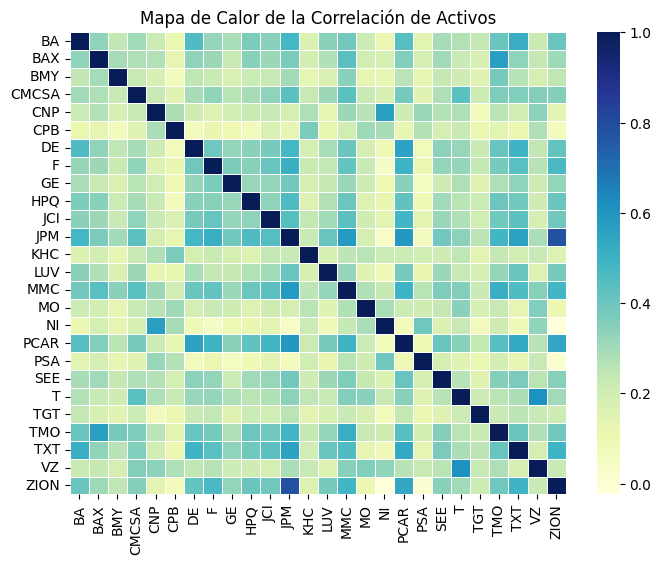

In [39]:
# Correlation matrix
mat_corr = returns.corr().to_numpy() 

# Configurando el tamaño de la figura
plt.figure(figsize=(8, 6))
sns.heatmap(mat_corr, linewidths=.5, cmap="YlGnBu", xticklabels=assets, yticklabels=assets)
# Añadiendo título
plt.title("Mapa de Calor de la Correlación de Activos")

# Mostrando la gráfica
plt.show()


To visualize the risk-return characteristics of individual assets, we will plot their expected returns against their volatilities. This chart provides a clear view of each asset's performance in terms of return per unit of risk, helping us identify attractive investment opportunities.


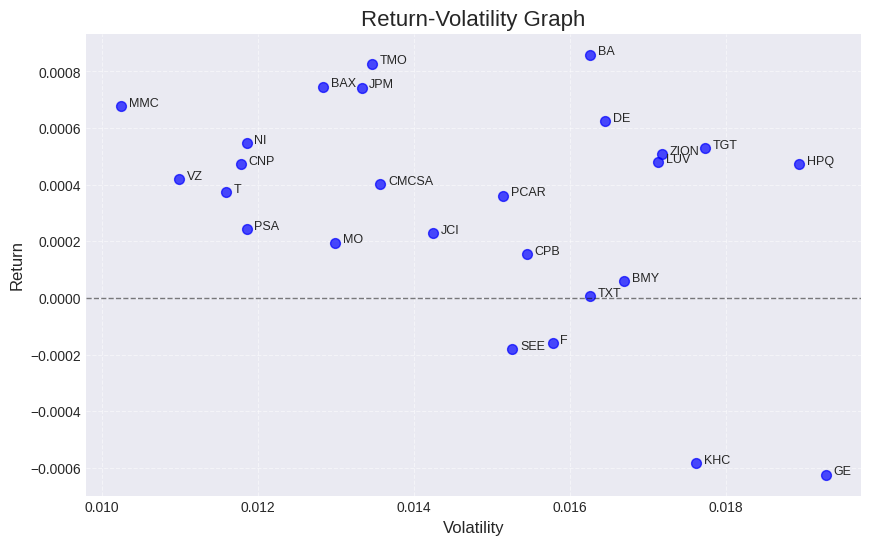

In [40]:
# Estableciendo un tamaño y estilo para el gráfico
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-darkgrid')

plt.scatter(np.sqrt(np.diag(matriz_cov)), retornos_esperados, color='blue', s=50, label='Activos', alpha=0.7)

plt.axhline(0, color='black', lw=1, linestyle='--', alpha=0.5)

# Añadiendo títulos y etiquetas
plt.title('Return-Volatility Graph', fontsize=16)
plt.xlabel('Volatility', fontsize=12)
plt.ylabel('Return', fontsize=12)

# Añadiendo leyenda con mejor posición
#plt.legend(loc='best')

# Añadiendo los nombres de los activos con un desplazamiento
desplazamiento_x = 0.0001  # Ajusta este valor según sea necesario

for i, asset in enumerate(assets):
    plt.text(np.sqrt(matriz_cov[i, i]) + desplazamiento_x, retornos_esperados[i] , asset, fontsize=9)



# Mostrando la cuadrícula para mejor lectura
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar el gráfico
plt.show()


## Exercise 2: Minimum Volatility portfolio calculation

We will now compute the weights of the minimum risk portfolio.

In [41]:
#Variables de decisión
pesos = cp.Variable(num_act)

In [42]:
#Restricciones suponiendo que no hay posiciones cortas y que invierte todo el capital
constraints = [pesos >= 0,
               cp.sum(pesos) == 1,
               ]

In [43]:
#Función Objetivo
riesgo = cp.quad_form(pesos, matriz_cov) # Riesgo de la cartera. OJO ES LA VARIANZA
objective = cp.Minimize(riesgo) # Minimizar la varianza

In [44]:
#Problema y resuelvo
prob = cp.Problem(objective, constraints)
resultado = prob.solve()

In [45]:
#Guardamos los valores de la rentabilidad y riesgo de la cartera de mínimo riesgo
ret = retornos_esperados.T @ pesos 
min_riesgo = np.array([riesgo.value, ret.value])

In [46]:
print(f'Los pesos que hacen que la cartera tenga el mínimo riesgo son: \n{pesos.value}')

Los pesos que hacen que la cartera tenga el mínimo riesgo son: 
[-1.52338442e-19  7.18330194e-02  3.84883022e-02  1.82481085e-02
  6.19058765e-02  3.86458151e-02  2.27469553e-04  5.16913446e-03
  3.81686056e-03 -4.85737749e-19  3.56267499e-02  3.94742421e-02
  2.69954963e-19  2.92422459e-02  1.03708578e-01  7.00234394e-02
  1.06628372e-01 -1.09163665e-19  1.56190722e-01  4.59027133e-03
  8.12774264e-02  4.68244640e-02 -3.26457644e-19 -4.18304515e-19
  8.66577024e-02  1.42120150e-03]


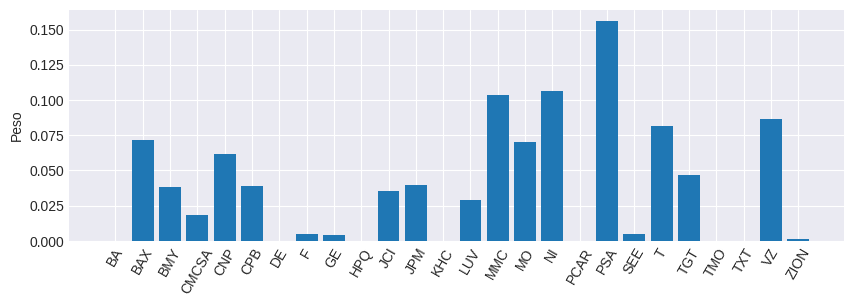

In [47]:
plt.figure(figsize=(10, 3))
plt.bar(range(num_act), pesos.value)
plt.xticks(range(num_act), assets, rotation=60)
plt.ylabel("Peso")
plt.show()

In [48]:
#ponemos a cero los pesos menores a 10**-4

pesos_ajustados = np.array([np.round(x, 3) if x > 10**-4 else 0  for x in pesos.value])
pesos_ajustados

array([0.   , 0.072, 0.038, 0.018, 0.062, 0.039, 0.   , 0.005, 0.004,
       0.   , 0.036, 0.039, 0.   , 0.029, 0.104, 0.07 , 0.107, 0.   ,
       0.156, 0.005, 0.081, 0.047, 0.   , 0.   , 0.087, 0.001])

In [49]:
activos_min_vol = [asset for i, asset in enumerate(assets) if pesos_ajustados[i] > 0] # Activos con pesos mayores a 10**-4
pesos_min_vol = [x for x in pesos_ajustados if x > 0] # Pesos mayores a 10**-4

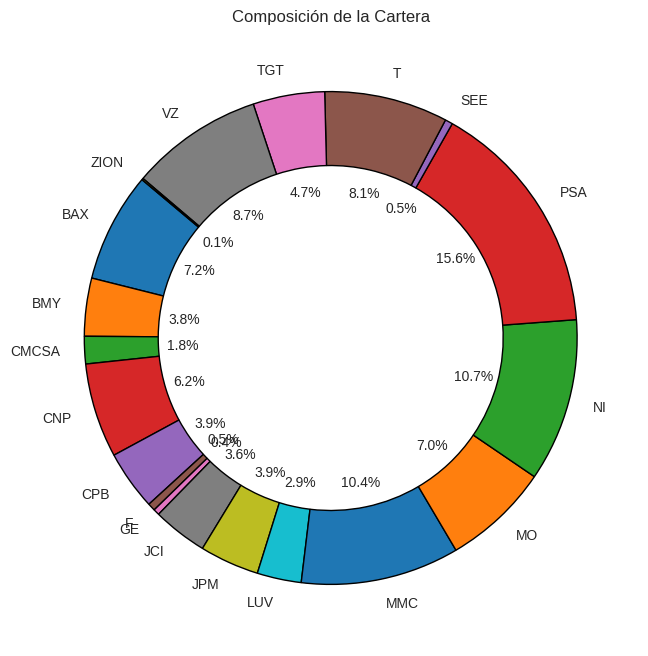

In [50]:
# Crear el gráfico de donut
plt.figure(figsize=(8, 8))

plt.pie(pesos_min_vol, labels=activos_min_vol, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3, 'edgecolor': 'black'})

# Añadir título
plt.title('Composición de la Cartera')

# Mostrar el gráfico
plt.show()

We can calculate daily returns:

In [51]:
returns_min_vol = returns.loc[:, activos_min_vol]@pesos_min_vol

<Axes: title={'center': 'Cumulative Returns of the Minimum Risk Portfolio'}, xlabel='Date', ylabel='Cumulative Returns'>

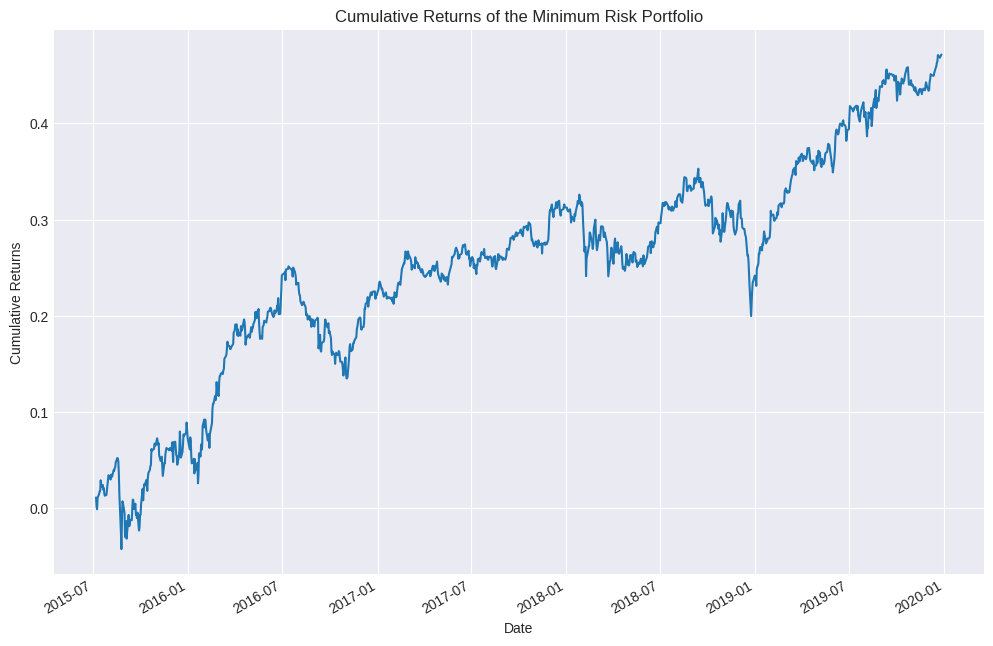

In [52]:
returns_min_vol.cumsum().plot(
    figsize=(12, 8),
    title="Cumulative Returns of the Minimum Risk Portfolio",
    xlabel="Date",
    ylabel="Cumulative Returns",
    grid=True,
    legend=False
)

## Exercise 3: Max Return portfolio Calculation

We will now compute the weights of the maximum return portfolio.

In [53]:
#Variables de decisión
pesos = cp.Variable(num_act)

In [54]:
#Restricciones
constraints = [pesos >= 0,  # No shorting
               cp.sum(pesos) == 1, # Fully invested
               ]

In [55]:
# Cálculo de la cartera de máxima rentabilidad

ret = retornos_esperados.T @ pesos 

objective = cp.Maximize(ret)

prob = cp.Problem(objective, constraints)
resultado = prob.solve(solver=cp.CLARABEL)# Cálculo de la cartera de máxima rentabilidad


In [56]:
#Guardamos los valores de la rentabilidad y riesgo de la cartera de máxima rentabilidad
riesgo = cp.quad_form(pesos, matriz_cov)
max_ret = np.array([riesgo.value, ret.value])

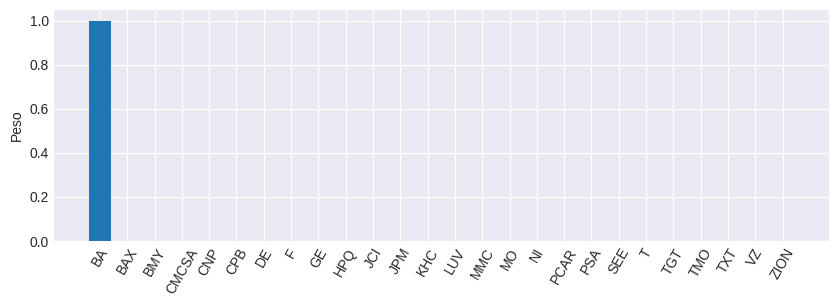

In [57]:
plt.figure(figsize=(10, 3))
plt.bar(range(num_act), pesos.value)
plt.xticks(range(num_act), assets, rotation=60)
plt.ylabel("Peso")
plt.show()

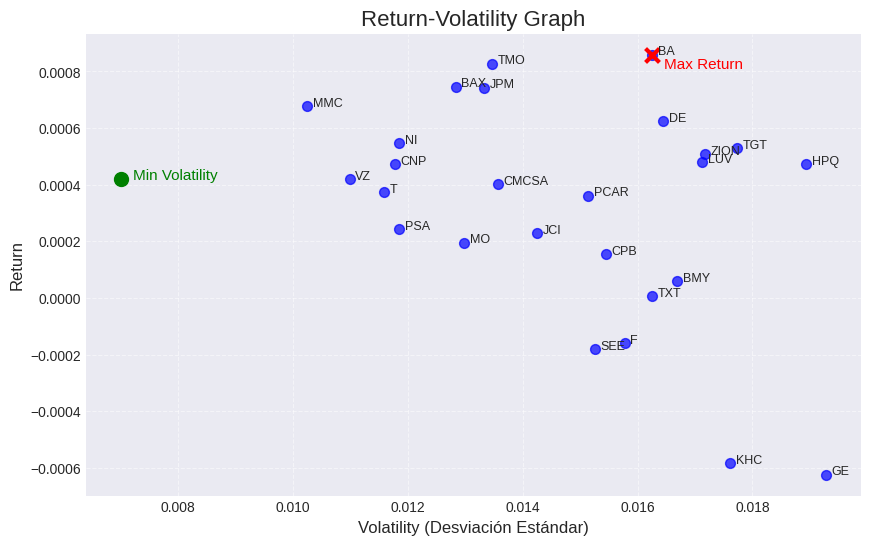

In [58]:
# Estableciendo un tamaño y estilo para el gráfico
plt.figure(figsize=(10, 6))

# Puntos de cada activo
plt.scatter(np.sqrt(np.diag(matriz_cov)), retornos_esperados, color='blue', s=50, label='Activos', alpha=0.7)

# Añadiendo los nombres de los activos con un desplazamiento
desplazamiento_x = 0.0001  # Ajusta este valor según sea necesario
desplazamiento_y = 0.00005  # Ajusta este valor según sea necesario

for i, asset in enumerate(assets):
    plt.text(np.sqrt(matriz_cov[i, i]) + desplazamiento_x, retornos_esperados[i] , asset, fontsize=9)


# Punto de mínimo riesgo
plt.scatter(np.sqrt(min_riesgo[0]), min_riesgo[1], color='green', s=100, marker='o', label='Mínimo Riesgo')
plt.text(np.sqrt(min_riesgo[0]) + 2*desplazamiento_x, min_riesgo[1], 'Min Volatility', fontsize=11, color='green')

# Punto de máximo retorno
plt.scatter(np.sqrt(max_ret[0]), max_ret[1], color='red', s=100, marker='x', linewidths=3, label='Máximo Retorno')
plt.text(np.sqrt(max_ret[0]) + 2*desplazamiento_x, max_ret[1] - desplazamiento_y, 'Max Return', fontsize=11, color='red')

# Añadiendo títulos y etiquetas
plt.title('Return-Volatility Graph', fontsize=16)
plt.xlabel('Volatility (Desviación Estándar)', fontsize=12)
plt.ylabel('Return', fontsize=12)

# Añadiendo leyenda con mejor posición
#plt.legend(loc='best')

# Mostrando la cuadrícula para mejor lectura
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar el gráfico
plt.show()


We can compare now the cumulative returns of both portfolios

<Axes: title={'center': 'Rentabilidad de la Cartera de Mínimo Riesgo'}, xlabel='Date'>

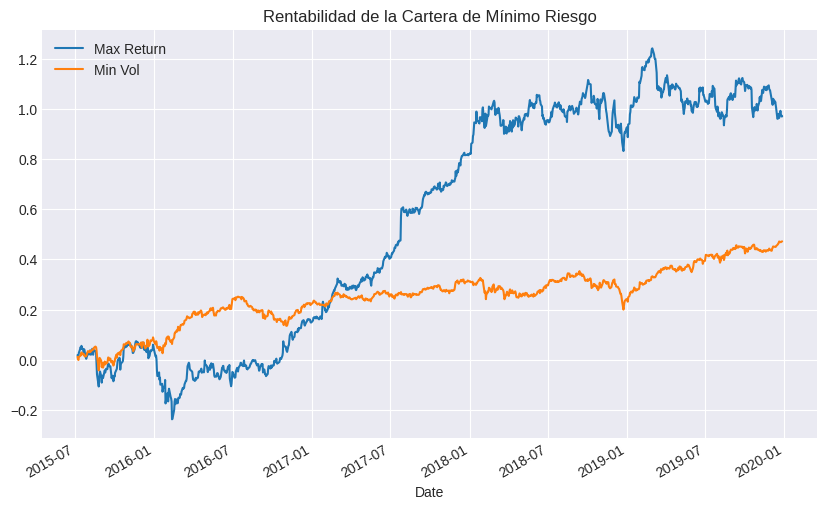

In [59]:
returns['BA'].cumsum().plot(figsize=(10, 6), title='Rentabilidad de la Cartera de Máximo Retorno', label='Max Return', legend=True)
returns_min_vol.cumsum().plot(figsize=(10, 6), title='Rentabilidad de la Cartera de Mínimo Riesgo', label='Min Vol', legend=True)


## Exercise 4: Portfolio with *Maximum Return* given a *Maximum Allowed Risk*


Let's calculate the optimal profolio once a maximum risk is defined.

In [60]:
#riesgo máximo
riesgo_obj = 0.012

In [61]:
#Variables de decisión
pesos = cp.Variable(num_act)

# Función objetivo
rentabilidad = cp.Maximize(retornos_esperados.T @ pesos)

#Restricciones
riesgo = cp.quad_form(pesos, matriz_cov)

constraints = [pesos >= 0,
                cp.sum(pesos) == 1,
                riesgo <= riesgo_obj**2 # OJO AQUI! riesgo objetivo al cuadrado
                ]

prob = cp.Problem(rentabilidad, constraints)
resultado = prob.solve(solver=cp.CLARABEL)

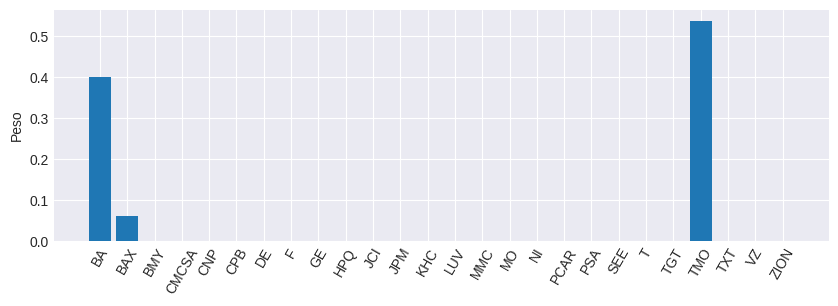

In [62]:
plt.figure(figsize=(10, 3))
plt.bar(range(num_act), pesos.value)
plt.xticks(range(num_act), assets, rotation=60)
plt.ylabel("Peso")
plt.show()

In [63]:
pesos_ajustados = np.array([np.round(x, 3) if x > 10**-4 else 0  for x in pesos.value])

activos_max_risk = [asset for i, asset in enumerate(assets) if pesos_ajustados[i] > 0]
pesos_max_risk = [x for x in pesos_ajustados if x > 0]

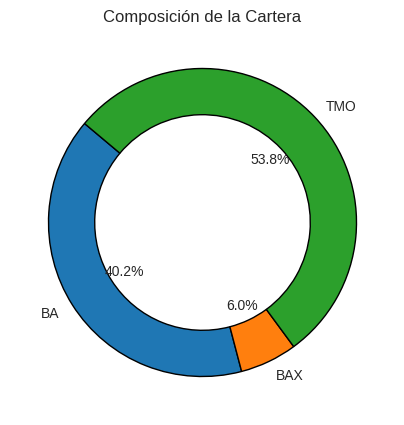

In [64]:
# Crear el gráfico de donut
plt.figure(figsize=(5, 5))

plt.pie(pesos_max_risk, labels=activos_max_risk, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3, 'edgecolor': 'black'})

# Añadir título
plt.title('Composición de la Cartera')

# Mostrar el gráfico
plt.show()

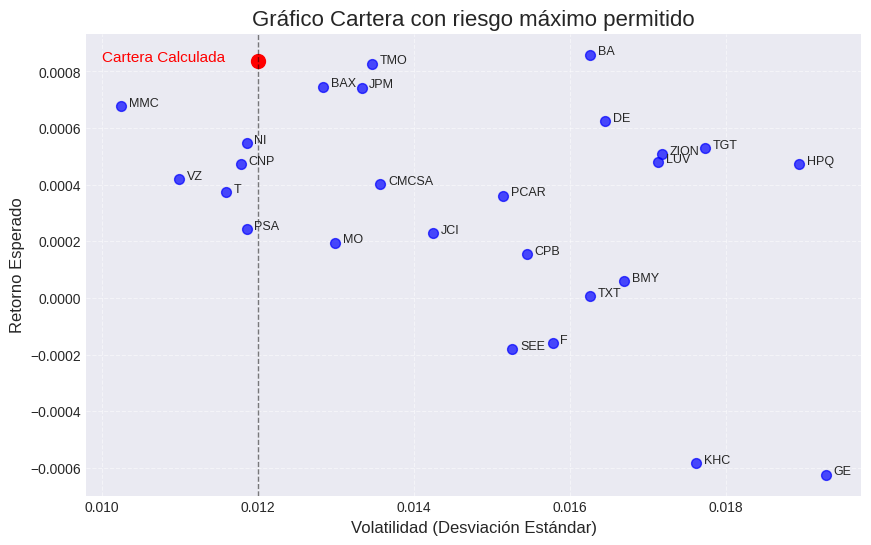

In [65]:
#Estableciendo un tamaño y estilo para el gráfico
plt.figure(figsize=(10, 6))

# Puntos de cada activo
plt.scatter(np.sqrt(np.diag(matriz_cov)), retornos_esperados, color='blue', s=50, alpha=0.7)


# Añadiendo los nombres de los activos con un desplazamiento
desplazamiento_x = 0.0001  # Ajusta este valor según sea necesario
desplazamiento_y = 0.00003  # Ajusta este valor según sea necesario

for i, asset in enumerate(assets):
    plt.text(np.sqrt(matriz_cov[i, i]) + desplazamiento_x, retornos_esperados[i] , asset, fontsize=9)



plt.scatter(np.sqrt(riesgo.value), resultado, color='red', s=100, marker='o')
plt.text(np.sqrt(riesgo.value) - 20 * desplazamiento_x, resultado, 'Cartera Calculada', fontsize=11, color='red')

plt.axvline(riesgo_obj, color='black', lw=1, linestyle='--', alpha=0.5)


# Añadiendo títulos y etiquetas
plt.title('Gráfico Cartera con riesgo máximo permitido', fontsize=16)
plt.xlabel('Volatilidad (Desviación Estándar)', fontsize=12)
plt.ylabel('Retorno Esperado', fontsize=12)

# Añadiendo leyenda con mejor posición
#plt.legend(loc='best')

# Mostrando la cuadrícula para mejor lectura
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar el gráfico
plt.show()

Let's compare all portfolios

In [66]:
returns_max_risk = returns.loc[:, activos_max_risk]@pesos_max_risk

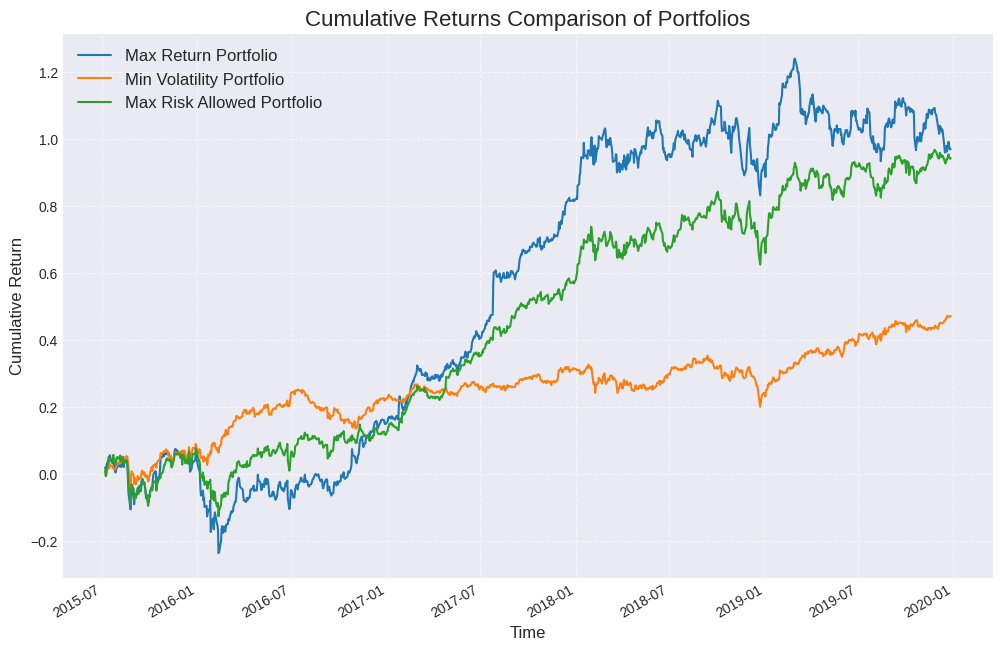

In [67]:
# Create a single plot for comparison
plt.figure(figsize=(12, 8))

# Plot cumulative returns for each portfolio
returns['BA'].cumsum().plot(label='Max Return Portfolio')
returns_min_vol.cumsum().plot(label='Min Volatility Portfolio')
returns_max_risk.cumsum().plot(label='Max Risk Allowed Portfolio')

# Add a title, labels, and grid
plt.title('Cumulative Returns Comparison of Portfolios', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Add a legend and improve its position
plt.legend(loc='upper left', fontsize=12)

# Show the plot
plt.show()


### Calculating the Efficient Frontier

We will compute the efficient frontier by varying risk levels between the minimum risk portfolio and the maximum return portfolio. For each risk level, we will determine the portfolio with the highest possible return.


In [68]:
# Arrays para guardar los resultados
riesgos = []
rentabilidades = []
pesos_lista = []  # Lista para guardar los pesos

# Iteramos sobre 100 niveles de riesgo permitidos (ajusta el rango si es necesario)
riesgo_vals = np.linspace(np.sqrt(min_riesgo[0]), np.sqrt(max_ret[0]), 100)  # Riesgos de las carteras de mínima volatilidad y máxima rentabilidad

for riesgo_obj in riesgo_vals:
    # Variables de decisión
    pesos = cp.Variable(num_act)

    # Función objetivo
    rentabilidad = cp.Maximize(retornos_esperados.T @ pesos)

    # Restricciones
    riesgo = cp.quad_form(pesos, matriz_cov)
    constraints = [
        pesos >= 0,
        cp.sum(pesos) == 1,
        riesgo <= riesgo_obj**2  # Riesgo objetivo al cuadrado
    ]

    # Resolver el problema de optimización
    prob = cp.Problem(rentabilidad, constraints)
    resultado = prob.solve(solver=cp.CLARABEL)

    # Guardamos los resultados
    if resultado is not None:  # Aseguramos que el problema se haya resuelto
        rentabilidades.append(resultado)
        riesgos.append(np.sqrt(riesgo.value))  # Guardamos el riesgo como desviación estándar
        pesos_lista.append(pesos.value)  # Guardamos los pesos óptimos como numpy array

# Ahora riesgos, rentabilidades y pesos_lista contienen los datos para la frontera eficiente


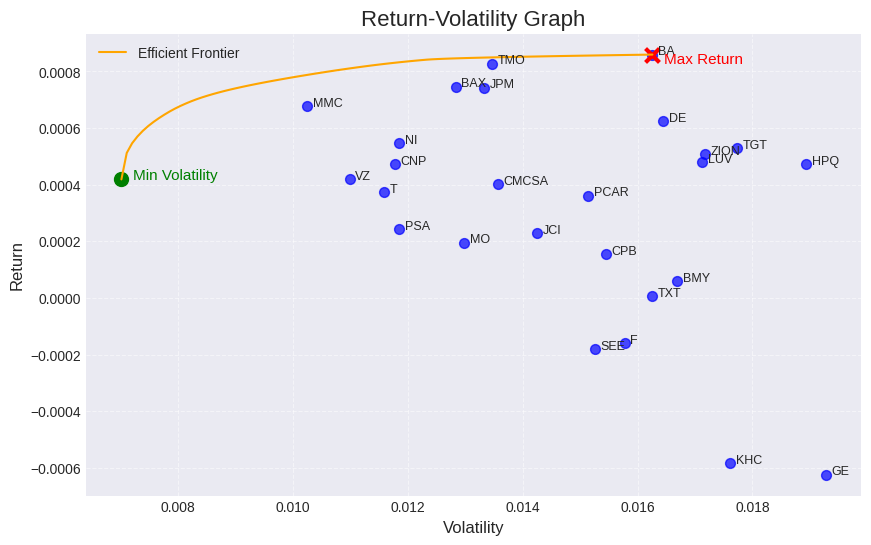

In [69]:
#Estableciendo un tamaño y estilo para el gráfico
plt.figure(figsize=(10, 6))

# Puntos de cada activo
plt.scatter(np.sqrt(np.diag(matriz_cov)), retornos_esperados, color='blue', s=50, alpha=0.7)


# Añadiendo los nombres de los activos con un desplazamiento
desplazamiento_x = 0.0001  # Ajusta este valor según sea necesario
desplazamiento_y = 0.00003  # Ajusta este valor según sea necesario

for i, asset in enumerate(assets):
    plt.text(np.sqrt(matriz_cov[i, i]) + desplazamiento_x, retornos_esperados[i] , asset, fontsize=9)
    
    
# Punto de mínimo riesgo
plt.scatter(np.sqrt(min_riesgo[0]), min_riesgo[1], color='green', s=100, marker='o')
plt.text(np.sqrt(min_riesgo[0]) + 2*desplazamiento_x, min_riesgo[1], 'Min Volatility', fontsize=11, color='green')

# Punto de máximo retorno
plt.scatter(np.sqrt(max_ret[0]), max_ret[1], color='red', s=100, marker='x', linewidths=3)
plt.text(np.sqrt(max_ret[0]) + 2*desplazamiento_x, max_ret[1] - desplazamiento_y, 'Max Return', fontsize=11, color='red')


# Añadiendo frontera eficiente
plt.plot(riesgos, rentabilidades, color = "orange", label="Efficient Frontier")


# Añadiendo títulos y etiquetas
plt.title('Return-Volatility Graph', fontsize=16)
plt.xlabel('Volatility', fontsize=12)
plt.ylabel('Return', fontsize=12)

# Añadiendo leyenda con mejor posición
plt.legend(loc='best')

# Mostrando la cuadrícula para mejor lectura
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar el gráfico
plt.show()

Let's analyze the evolution of portfolio composition as we move along the efficient frontier. We will calculate the weights of the optimal portfolio for different levels of risk and visualize how they change as risk increases.

/tmp/ipykernel_75821/3106322782.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  paleta = cm.get_cmap('tab20c', num_act)


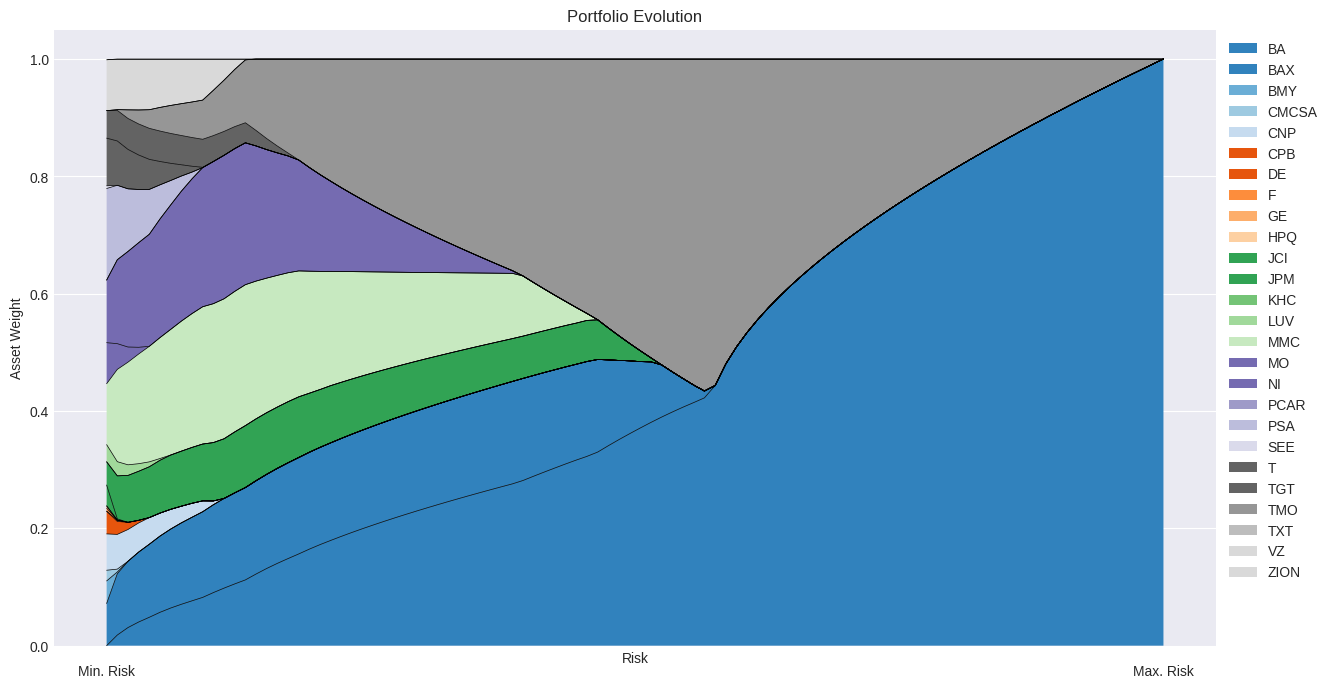

In [70]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Define number of assets and simulations (replace with your actual values)
num_act = len(assets)  # Number of assets
num_sim = len(pesos_lista)  # Number of risk simulations (number of portfolios)

# Convert the weights (pesos_lista) to a 2D NumPy array for plotting and reverse the rows
pesos_res = np.array(pesos_lista)  # Do NOT reverse the weights here

# Define a colormap and generate colors for each asset
paleta = cm.get_cmap('tab20c', num_act)
colores = [paleta(i) for i in range(num_act)]

# Reverse the order of the x-axis
tiempo = np.arange(num_sim)  # Reverse the time/simulation indices

plt.figure(figsize=(15, 8))

# Create the stacked plot
plt.stackplot(tiempo, pesos_res.T, colors=colores, labels=[f'{assets[i]}' for i in range(num_act)])

# Add borders to the areas
for i in range(num_act):
    plt.plot(tiempo, np.sum(pesos_res[:, :i + 1], axis=1), color='black', linewidth=0.5)

# Custom x-axis text for reversed x-axis
plt.text(tiempo[0], -0.05, 'Min. Risk', ha='center')  # Now corresponds to the first index
plt.text(tiempo[-1], -0.05, 'Max. Risk', ha='center')   # Now corresponds to the last index

# Add axis labels and title
plt.xlabel('Risk')
plt.ylabel('Asset Weight')
plt.title('Portfolio Evolution')

# Adjust legend to appear outside the plot area
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Remove x-axis ticks (optional)
plt.xticks([], [])

# Show the plot
plt.show()




## Exercise 5: Max Return Portfolios with Restrictions on the Maximum Amount Invested in a Single Asset


In [88]:
#Variables de decisión
pesos = cp.Variable(num_act)

# Función objetivo
rentabilidad = cp.Maximize(retornos_esperados.T @ pesos)

# #Restricciones

max_inv = 0.1 # Máxima inversión en un activo

riesgo = cp.quad_form(pesos, matriz_cov)

constraints = [pesos >= 0,
               cp.sum(pesos) == 1,
               pesos <= max_inv
                ]

prob = cp.Problem(rentabilidad, constraints)
resultado = prob.solve(solver=cp.CLARABEL)

In [89]:
pesos_ajustados = np.array([np.round(x, 3) if x > 10**-4 else 0  for x in pesos.value])

activos_filtrados = [asset for i, asset in enumerate(assets) if pesos_ajustados[i] > 0]
pesos_filtrados = [x for x in pesos_ajustados if x > 0]

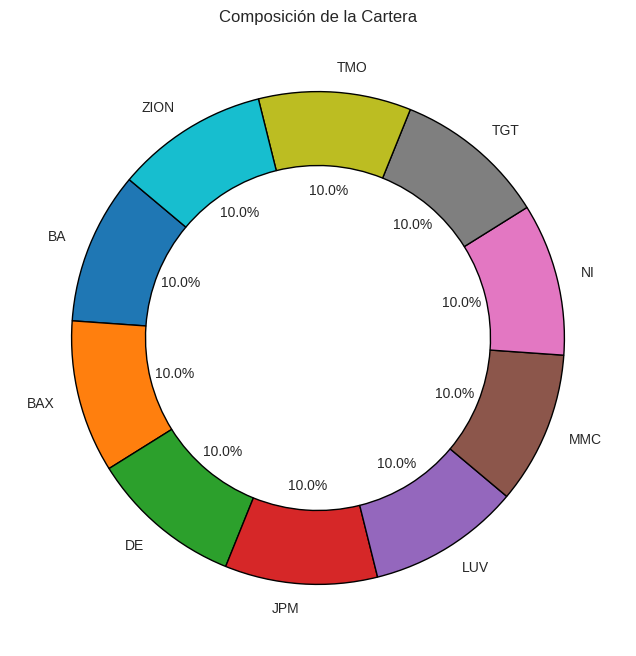

In [90]:
# Crear el gráfico de donut
plt.figure(figsize=(8, 8))

plt.pie(pesos_filtrados, labels=activos_filtrados, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3, 'edgecolor': 'black'})

# Añadir título
plt.title('Composición de la Cartera')

# Mostrar el gráfico
plt.show()

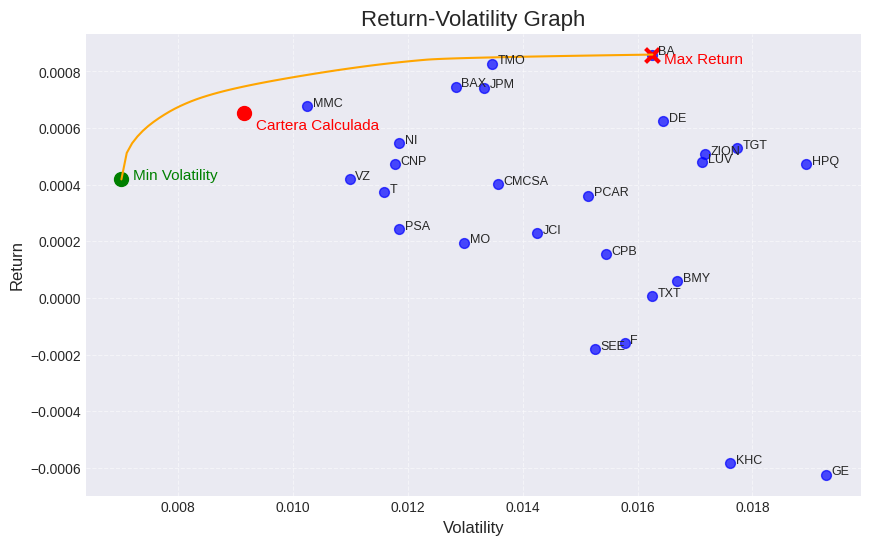

In [91]:
#Estableciendo un tamaño y estilo para el gráfico
plt.figure(figsize=(10, 6))

# Puntos de cada activo
plt.scatter(np.sqrt(np.diag(matriz_cov)), retornos_esperados, color='blue', s=50, alpha=0.7)


# Añadiendo los nombres de los activos con un desplazamiento
desplazamiento_x = 0.0001  # Ajusta este valor según sea necesario
desplazamiento_y = 0.00003  # Ajusta este valor según sea necesario

for i, asset in enumerate(assets):
    plt.text(np.sqrt(matriz_cov[i, i]) + desplazamiento_x, retornos_esperados[i] , asset, fontsize=9)
    
    
# Punto de mínimo riesgo
plt.scatter(np.sqrt(min_riesgo[0]), min_riesgo[1], color='green', s=100, marker='o', label='Mínimo Riesgo')
plt.text(np.sqrt(min_riesgo[0]) + 2*desplazamiento_x, min_riesgo[1], 'Min Volatility', fontsize=11, color='green')

# Punto de máximo retorno
plt.scatter(np.sqrt(max_ret[0]), max_ret[1], color='red', s=100, marker='x', linewidths=3, label='Máximo Retorno')
plt.text(np.sqrt(max_ret[0]) + 2*desplazamiento_x, max_ret[1] - desplazamiento_y, 'Max Return', fontsize=11, color='red')

plt.scatter(np.sqrt(riesgo.value), resultado, color='red', s=100, marker='o', label='Cartera Calculada')
plt.text(np.sqrt(cp.quad_form(pesos, matriz_cov).value) + 2*desplazamiento_x, resultado - 2*desplazamiento_y, 'Cartera Calculada', fontsize=11, color='red')


# Añadiendo frontera eficiente
plt.plot(riesgos, rentabilidades, color = "orange", label="Efficient Frontier")


# Añadiendo títulos y etiquetas
plt.title('Return-Volatility Graph', fontsize=16)
plt.xlabel('Volatility', fontsize=12)
plt.ylabel('Return', fontsize=12)

# Añadiendo leyenda con mejor posición
#plt.legend(loc='best')

# Mostrando la cuadrícula para mejor lectura
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar el gráfico
plt.show()